In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xarray
import glob

%pylab inline
pylab.rcParams['figure.figsize'] = (8, 8) # Large figures
pylab.rcParams['image.cmap'] = 'seismic'
dpi=200;

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
mesh = xarray.open_dataset('/lcrc/group/e3sm/public_html/inputdata/ocn/mpas-o/EC30to60E2r2/ocean.EC30to60E2r2.210210.nc')
lat = mesh.latCell.values*180./np.pi
lon = mesh.lonCell.values*180./np.pi
tran = xarray.open_dataset('/lcrc/group/e3sm/public_html/inputdata/ocn/mpas-o/EC30to60E2r2/EC30to60E2r2_moc_masks_and_transects.nc')


In [35]:
files = sorted(glob.glob('/lcrc/group/e3sm/ac.vanroekel/scratch/chrys/20220516.testG-checkEkmanMonin.chrys/run/*mpaso.hist.am.timeSeriesStatsMonthly.*'))

In [36]:
#create an averaging mask based on temperature
ds = xarray.open_dataset(files[0])
temp = ds.timeMonthly_avg_activeTracers_temperature[0,:,:].values
ind0 = np.where(temp<-10)[0]
ind1 = np.where(temp<-10)[1]
mask = np.ones_like(temp)
mask[ind0,ind1] = np.nan

In [37]:
#regions 
# Atlantic = 0
# IndoPac = 1
# Pac = 2
# Indian = 3
region = 0
inds = np.where(tran.regionCellMasks[:,region].values==1)[0]

In [38]:
#avg KE over a depth range and compute over time
startYr = 1
endYr = 10 #assumes to go to end of the year

In [39]:
latS = lat[inds]
indT = np.where(latS > 0)[0]
indN = inds[indT]
indT = np.where(latS <= 0)[0]
indS = inds[indT]
lonNH = lon[indN]
lonSH = lon[indS]
latNH = lat[indN]
latSH = lat[indS]
area = mesh.areaCell.values
bd = -mesh.refBottomDepth.values

In [40]:
#iterate through files -- this can be more efficient I think
startind = (startYr - 1)*12
endind = (endYr-1)*12+12+1
nz = len(bd)
keNH = np.zeros((endind-startind,nz))
keSH = np.zeros((endind-startind,nz))
for i in range(startind,endind):
    ds = xarray.open_dataset(files[i])
    ke = 0.5*(ds.timeMonthly_avg_velocityMeridional[0,:,:].values**2 + \
              ds.timeMonthly_avg_velocityZonal[0,:,:].values**2)
    keNH[i,:] = np.nansum(ke[indN,:]*area[indN,np.newaxis]*mask[indN,:],axis=0) / \
                np.nansum(mask[indN,:]*area[indN,np.newaxis],axis=0)
    keSH[i,:] = np.nansum(ke[indS,:]*area[indS,np.newaxis]*mask[indS,:],axis=0) / \
                np.nansum(mask[indS,:]*area[indS,np.newaxis],axis=0)
    ds.close()

IndexError: list index out of range

In [41]:
i

120

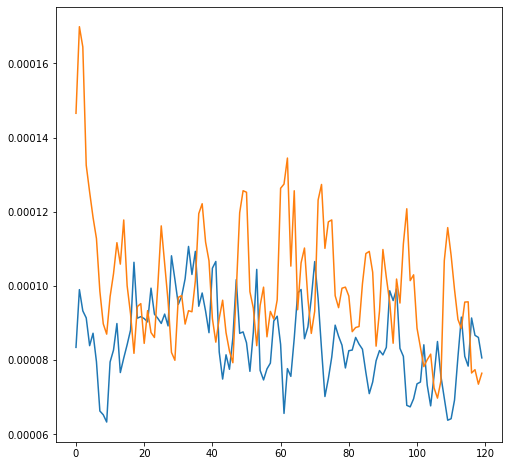

In [43]:
dep = -2000
ind = abs(dep-bd).argmin()
plt.plot(keSH[:-2,ind])
plt.plot(keNH[:-2,ind])

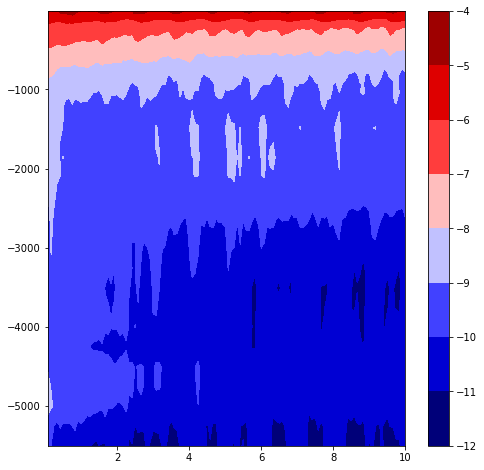

In [48]:
plt.contourf(np.linspace(1,120,120)/12,bd,np.log(keNH[:-2,:].T))
plt.colorbar()

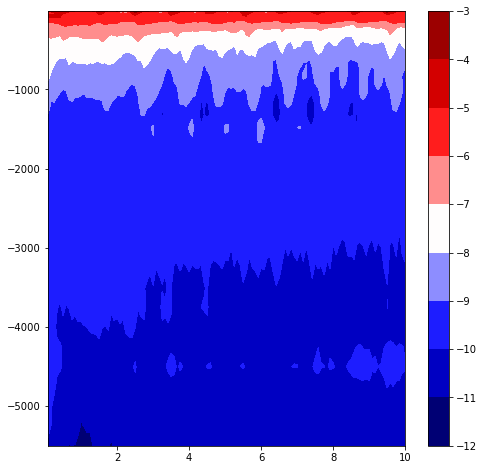

In [49]:
plt.contourf(np.linspace(1,120,120)/12,bd,np.log(keSH[:-2,:].T))
plt.colorbar()